In [1]:
%pip install imageio
%pip install scipy
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hotro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hotro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hotro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2.1 Nạp ảnh sử dụng thư viện Python Image Library (PIL)

In [2]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hotro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2.2 Nạp ảnh sử dụng lệnh thư viện imageio

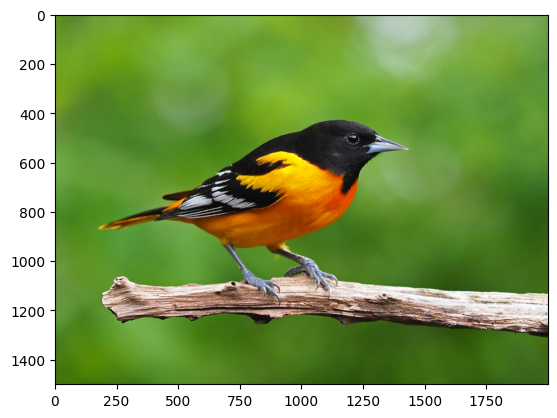

In [4]:
import numpy as np    
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

2.3 Độ phân giải ảnh

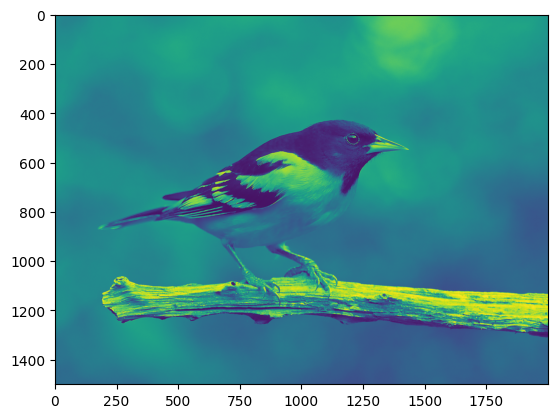

In [5]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread('bird.png', mode='L').astype(np.uint8)
plt.imshow(data)
plt.show() 

Nạp ảnh grayscale và giảm 4 bít thấp, giữ 4 bit cao. Lưu ảnh với tên là birdF0.png

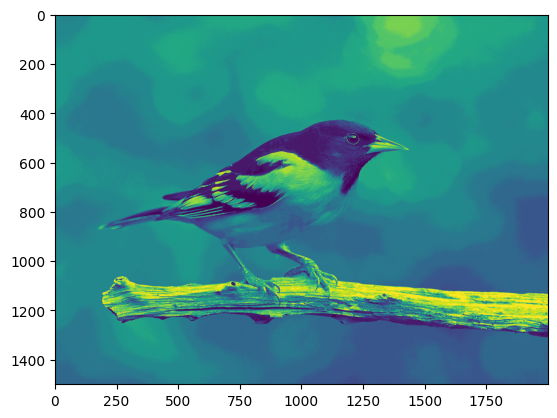

In [6]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread('bird.png', mode='L').astype(np.uint8)
cl = data & 0xF0
iio.imsave('bird0.png', cl)
tmp = iio.imread('bird0.png')
plt.imshow(tmp)
plt.show()

2.4 Màu sắc với hệ RGB

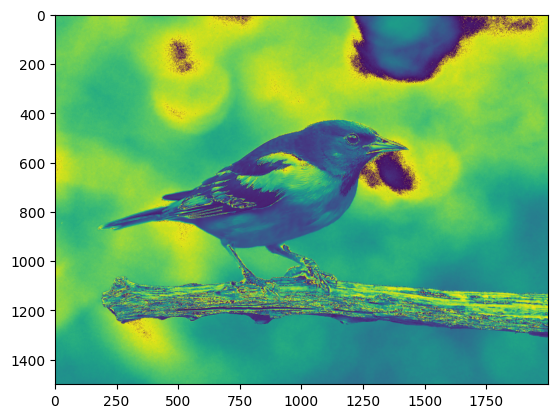

In [7]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread('bird.png')
bdata = (data[:, :, 1] + data[:, :, 2])
plt.imshow(bdata)
plt.show()

2.5 Màu sắc với hệ HSV

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.hsv_to_rgb(1, 1, 255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


2.6 Ứng dụng chuyển đổi hệ màu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


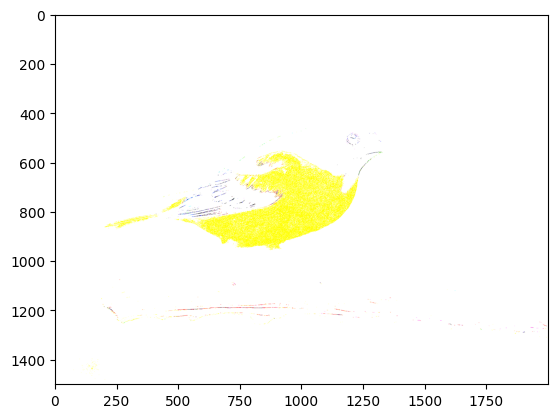

In [9]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h = h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

2.7 Lọc ảnh

Lọc ảnh với mean filter

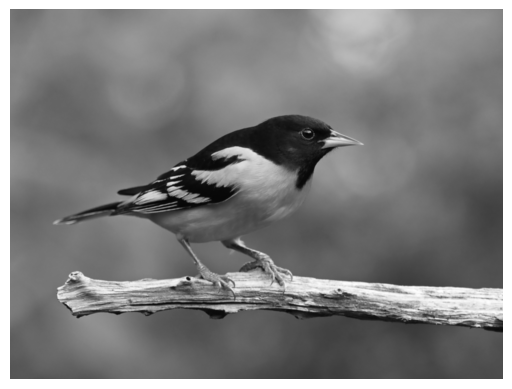

In [10]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

# Mở ảnh và chuyển đổi sang ảnh xám
image = iio.imread('bird.png', mode='L')

# Khởi tạo bộ lọc 5x5
filter_size = 5
filter_kernel = np.ones((filter_size, filter_size)) / (filter_size**2)

# Thực hiện phép tích chập
b = ndimage.convolve(image, filter_kernel).astype(np.uint8)

# Chuyển đổi từ mảng thành hình ảnh
plt.imshow(b, cmap='gray')
plt.axis('off')  # Tắt trục
plt.show()

Lọc ảnh với median filter

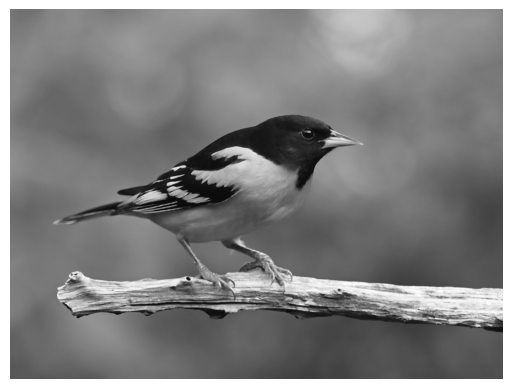

In [11]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
# Mở ảnh và chuyển đổi sang ảnh xám
image = iio.imread('bird.png', mode='L').astype(np.uint8)
# Thực hiện bộ lọc trung vị với kích thước 5x5
filtered_image = sn.median_filter(image, size=5, footprint=None, output=None, mode='reflect', cval=0)
# Chuyển đổi từ mảng thành hình ảnh
iio.imsave('bird_median_filter.png', filtered_image)
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')  # Tắt trục
plt.show()

Lọc ảnh với Max filter

Mảng giá trị pixel của ảnh đã lọc:
[[122 122 122 ... 139 139 139]
 [129 129 129 ... 139 139 139]
 [129 129 129 ... 139 139 139]
 ...
 [ 97  97  97 ...  84  84  84]
 [ 97  97  97 ...  84  84  84]
 [ 97  97  97 ...  84  84  84]]


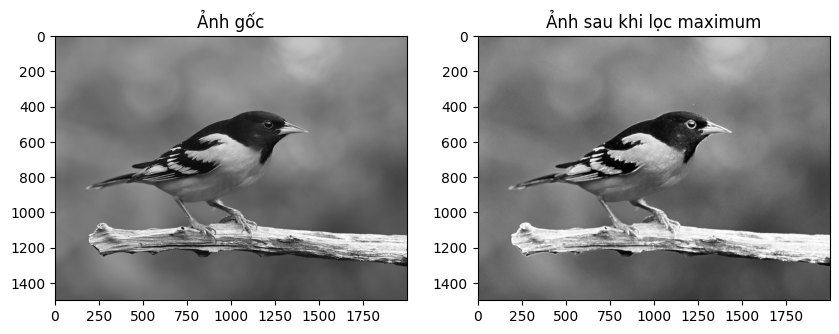

In [12]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
a = iio.imread('bird.png', mode='L').astype(np.uint8)

# Áp dụng bộ lọc maximum với kích thước cửa sổ 5x5
b = sn.maximum_filter(a, size=5, footprint=None, mode='reflect')

# Lưu ảnh đã lọc
iio.imsave('bird_max_filter.png', b)

# Hiển thị thông tin ảnh đã lọc
print("Mảng giá trị pixel của ảnh đã lọc:")
print(b)

# Hiển thị ảnh gốc và ảnh đã lọc
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 2, 2)
plt.imshow(b, cmap='gray')
plt.title('Ảnh sau khi lọc maximum')

plt.show()

Lọc ảnh với Min filter

Mảng giá trị pixel của ảnh đã lọc:
[[118 118 117 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 ...
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  78  78  78]]


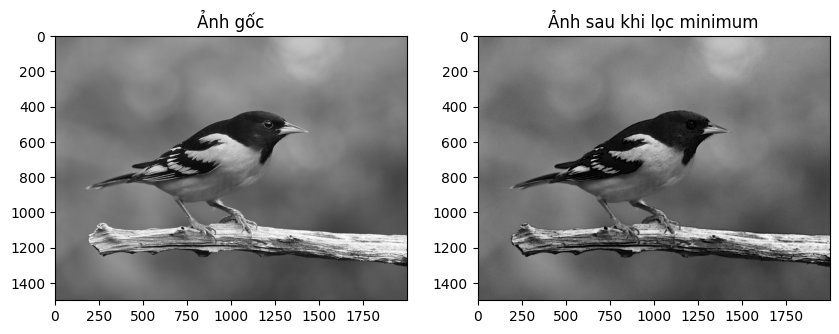

In [13]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
a = iio.imread('bird.png', mode='L').astype(np.uint8)

# Áp dụng bộ lọc minimum với kích thước cửa sổ 5x5
b = sn.minimum_filter(a, size=5, footprint=None, mode='reflect')

# Lưu ảnh đã lọc
iio.imsave('bird_min_filter.png', b)

# Hiển thị thông tin ảnh đã lọc
print("Mảng giá trị pixel của ảnh đã lọc:")
print(b)

# Hiển thị ảnh gốc và ảnh đã lọc
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 2, 2)
plt.imshow(b, cmap='gray')
plt.title('Ảnh sau khi lọc minimum')

plt.show()

In [14]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hotro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


3 Bài tập

1. Nạp một ảnh và lưu thành 3 ảnh với 3 màu khác nhau

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh
img = cv2.imread('bird.png')
b, g, r = cv2.split(img)

# Tạo ảnh với từng kênh màu riêng biệt
img_red = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])
img_green = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])
img_blue = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])

# Lưu ảnh
cv2.imwrite('bird_red.png', img_red)
cv2.imwrite('bird_green.png', img_green)
cv2.imwrite('bird_blue.png', img_blue)

True

2. Nạp một ảnh và hoán đổi giá trị các màu. Lưu các ảnh vào máy.

In [16]:
# Hoán đổi kênh màu: R <-> B
img_swap = cv2.merge([r, g, b])
cv2.imwrite('bird_swap.png', img_swap)

True

3. Chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau. 

In [17]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# Hiển thị và lưu từng kênh HSV
cv2.imwrite('bird_H.png', h)
cv2.imwrite('bird_S.png', s)
cv2.imwrite('bird_V.png', v)

True

4. Chuyển sang hệ màu HSV. Lưu ảnh mới với kênh Hnew = 1/3 Hold, Vnew = 3/4 Vold.

In [18]:
h_new = (h // 3).astype(np.uint8)
v_new = (v * 0.75).astype(np.uint8)

hsv_modified = cv2.merge([h_new, s, v_new])
bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)
cv2.imwrite('bird_modified.png', bgr_modified)

True